# Uber Ride Data Analysis

This dataset contains details of uber rides of a customer.<br>
**Dataset:** The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals etc) [dataset](https://www.kaggle.com/zusmani/uberdrives).<br>


# Objective

To fetch insights from the behavior of an common Uber customer.

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uberdrives/My Uber Drives - 2016.csv


# Loading dataset

In [2]:
df = pd.read_csv('/kaggle/input/uberdrives/My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
print(df.shape)
df.dtypes

(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

**There are 6 catagorical vars and 1 numeric type variable**<br>
***Here STATR_DATE* and END_DATE* are in object type. We need to convert them back into datetime variable***

# Checking for null values

In [5]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


**As we can see this row contains wrong data for most of the columns. We will delete it**

In [7]:
# dropping row containing null vals
df.drop(df[df['END_DATE*'].isna()].index,axis=0,inplace=True)

In [8]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


**Now we have null data only in Purpose column. <br>
As we have more than 55% data missing. So I am dropping this columns and excluding this from this analysis.**
<br> You may also delete the null value rows and include this column in the analysis.<br>
```sns.countplot(df['PURPOSE*'], order=df['PURPOSE*'].value_counts().index)```


In [10]:
# droppig Purpose
df.drop(['PURPOSE*'],axis=1,inplace=True)
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0


# Checking for duplicate rows

In [11]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


We will remove this duplicate row

In [12]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


**Converting start_date & end_date cols into datetime** 

In [13]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

# EDA

# Univariate

## 1. Category

In [14]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

There are 2 ride-categories...  Business: For work related & Personal: For personal travel 

In [15]:
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles per Category')

<Figure size 432x288 with 0 Axes>

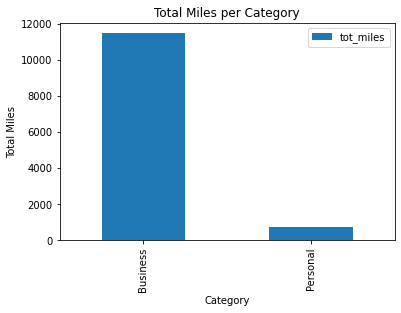

In [16]:
plt.figure()
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum')).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total Miles per Category')

**User mainly uses Uber cabs for its Business purposes**<br>
* Around 94% miles was consumed during Business trips.
* Only 6% miles were consumed during personal trips.

## START*

In [17]:
len(df['START*'].unique())

177

**There are 177 unique starting points**

In [18]:
# Top 10 Start places
df['START*'].value_counts(ascending=False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

<AxesSubplot:title={'center':'Top 10 Pickup places'}, ylabel='Pickup Count'>

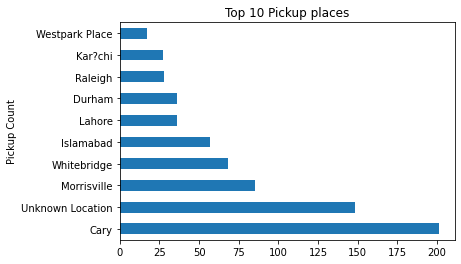

In [19]:

df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Pickup places')

**Cary is the most popular Starting point for this user**

## STOP*

In [20]:
len(df['STOP*'].unique())

188

**There are 188 unique Drop points (destination)**

<AxesSubplot:title={'center':'Top 10 Drop places'}, ylabel='Pickup Count'>

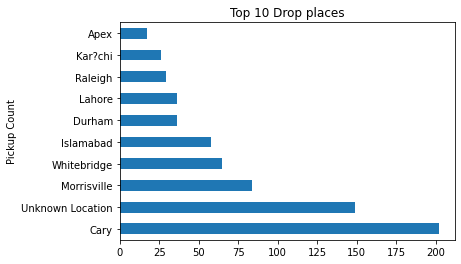

In [21]:

df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Drop places')

**Cary is the most popular Stop place for this user.**<br> 
***Maybe his home is in Cary (as mostly start & stop are from here)***

In [22]:
df[df['START*']=='Unknown Location']['START*'].value_counts()

Unknown Location    148
Name: START*, dtype: int64

In [23]:
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

Unknown Location    149
Name: STOP*, dtype: int64

## MILES*

<AxesSubplot:xlabel='MILES*', ylabel='Count'>

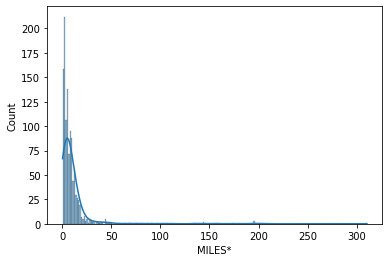

In [24]:
sns.histplot(df['MILES*'],kde=True)

**Miles data is Rightly Skewed **

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


## Multivariate analysis

In [26]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [27]:
df.groupby(['START*','STOP*'])['MILES*'].apply(print)

910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

START*         STOP*             
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES*, Length: 363, dtype: object

In [28]:
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

**Cary-Durham & Cary-Morrisville and vice versa are the farthest distance ride.**

**Checking for Round Trip**

<AxesSubplot:xlabel='ROUND_TRIP*', ylabel='count'>

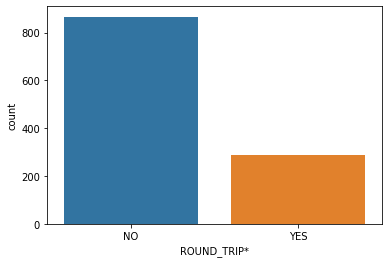

In [29]:
def is_roundtrip(df):
    if df['START*'] == df['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP*'] = df.apply(is_roundtrip, axis=1)

sns.countplot(x='ROUND_TRIP*',data=df, order=df['ROUND_TRIP*'].value_counts().index)

In [30]:
df['ROUND_TRIP*'].value_counts()

NO     866
YES    288
Name: ROUND_TRIP*, dtype: int64

**User mostly take single-trip Uber rides.**<br>
* Around 75% trip is single-trip and 25% are ROund-Trip

## Calculating Ride duration

In [31]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
ROUND_TRIP*            object
dtype: object

In [32]:
df['Ride_duration'] = df['END_DATE*']-df['START_DATE*']
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,0 days 01:07:00


**Converting Ride_duration into Minutes**

In [33]:
# using datetime.Timedelta  => https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html
df.loc[:, 'Ride_duration'] = df['Ride_duration'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,67.0


In [34]:
#Capture Hour, Day, Month and Year of Ride in a separate column
df['month'] = pd.to_datetime(df['START_DATE*']).dt.month
df['Year'] = pd.to_datetime(df['START_DATE*']).dt.year
df['Day'] = pd.to_datetime(df['START_DATE*']).dt.day
df['Hour'] = pd.to_datetime(df['START_DATE*']).dt.hour

df['day_of_week'] = pd.to_datetime(df['START_DATE*']).dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,month,Year,Day,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,1,2016,1,21,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,1,2016,2,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,13.0,1,2016,2,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,14.0,1,2016,5,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,67.0,1,2016,6,14,Wed


**Addding month name instead of month number**

In [35]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,month,Year,Day,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,Jan,2016,1,21,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,Jan,2016,2,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,13.0,Jan,2016,2,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,14.0,Jan,2016,5,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,67.0,Jan,2016,6,14,Wed


**Total rides/month**

In [36]:
print(df['month'].value_counts())

Dec    146
Aug    133
Nov    122
Feb    115
Mar    113
Jul    112
Jun    107
Oct    106
Jan     61
Apr     54
May     49
Sep     36
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

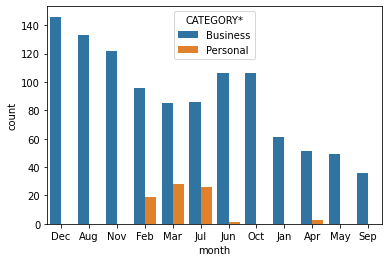

In [37]:
sns.countplot(x='month',data=df,order=pd.value_counts(df['month']).index,hue='CATEGORY*')

**Most number of rides were in month of December (all of them were Business trips)**<br>
Top 5 months having most trips were:    December,August,November,February & March.<br>
**Uber Ride was used at Feb,Mar,Jul,Jun & Apr for personal trips.**

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

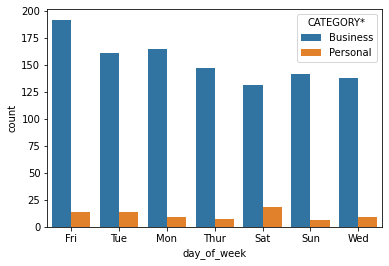

In [38]:
sns.countplot(x='day_of_week',data=df,order=pd.value_counts(df['day_of_week']).index,hue='CATEGORY*')

**FRIDAY was the day at which uber rides were mostly used**

**Average distance covered/month**

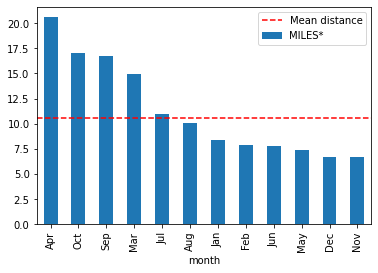

In [39]:
df.groupby('month').mean()['MILES*'].sort_values(ascending = False).plot(kind='bar')
plt.axhline(df['MILES*'].mean(), linestyle='--', color='red', label='Mean distance')
plt.legend()
plt.show()

**User's Longest ride were on April & shortest were on November**

<AxesSubplot:xlabel='Hour', ylabel='count'>

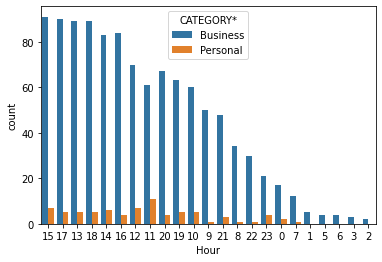

In [40]:
sns.countplot(x='Hour',data=df,order=pd.value_counts(df['Hour']).index,hue='CATEGORY*')

**Maximim number of trips were on Evening & at noon.**

### Calculating Trip speed

In [41]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,month,Year,Day,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,Jan,2016,1,21,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,Jan,2016,2,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,13.0,Jan,2016,2,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,14.0,Jan,2016,5,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,67.0,Jan,2016,6,14,Wed


In [42]:
df['Duration_hours'] = df['Ride_duration']/60
df['Speed_KM'] = df['MILES*']/df['Duration_hours']
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_duration,month,Year,Day,Hour,day_of_week,Duration_hours,Speed_KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,6.0,Jan,2016,1,21,Fri,0.1,51.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,12.0,Jan,2016,2,1,Sat,0.2,25.0


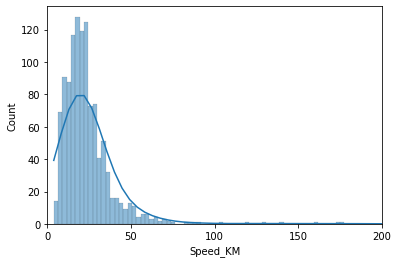

In [43]:
fig, ax = plt.subplots()
sns.histplot(x='Speed_KM',data=df,kde=True,ax=ax)
ax.set_xlim(1,31)
ax.set_xticks([x*50 for x in range(0,5)])


**Speed is right skewed**

# Conclusion

* **User mainly uses Uber cabs for its Business purposes** <br>
    * Around 94% miles was consumed during Business trips.
    * Only 6% miles were consumed during personal trips.
* There are 177 unique starting points<br>
    * **Cary is most poplular starting point for this driver.**
* There are 188 unique Stop points.
    * **Cary is most poplular drop point for this driver.**
* **Cary-Durham & Cary-Morrisville and vice versa are the User's longest distance Uber ride.**
* **User usually takes single-trip Uber rides.**
    * Around 75% trip is single-trip and 25% are Round-Trip.
* **User's Most number of rides were in month of December & Least were in September.**
* **Friday has maximum number of trips.**
* **Afternoons and evenings seem to have the maximum number of trips.**
* **User's Longest ride were on April & shortest were on November**